In [ ]:
import librosa
import librosa.display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SR = 16000

In [ ]:
music,_ = librosa.load('/content/drive/MyDrive/EE603-Project/music.wav',sr=SR) 
speech,_ = librosa.load('/content/drive/MyDrive/EE603-Project/speech.wav',sr=SR)

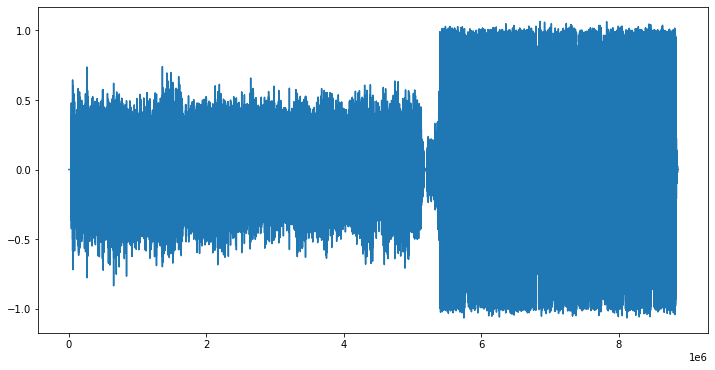

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(music)  #mixed two different music files for better accuracy 

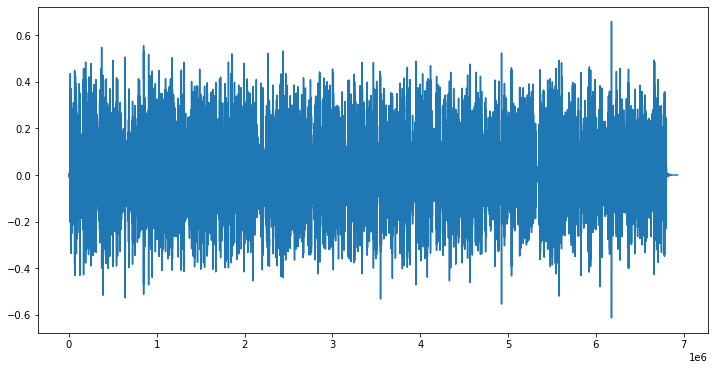

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(speech)

In [ ]:
import os
!pwd

/content


In [ ]:
!mkdir audio_files
%cd audio_files
!pwd

/content/audio_files
/content/audio_files


In [ ]:
onset = []
offset = []
filename = []
class_ = []
i = 0
count = 0

In [ ]:
while True:
  music_value = np.random.randint(1,5)
  speech_value = np.random.randint(1,5)
  zero_value = 10-speech_value-music_value
  music_length = music_value*SR
  speech_length = speech_value*SR
  zero_length = zero_value*SR


  if i+music_length >len(music) or i+speech_length > len(speech):
    break
  else:
    fn = 'sound'+str(count)+'_.wav'
    x = np.zeros(zero_length)
    m = music[i:i+music_length]
    s = speech[i:i+speech_length]

    cd = np.random.randint(2)
    if(cd):

      r_no = np.random.randint(len(x))
      if(abs(round(r_no/SR,4))>=0.02):
        onset.append(0)
        offset.append(round(r_no/SR,4))
        class_.append('silence')
        filename.append(fn)
      
      onset.append(round(r_no/SR,4))
      o = round(r_no/SR,4) + music_value
      offset.append(o)
      class_.append('music')
      filename.append(fn)
      x = np.insert(x,r_no,m)

      si = np.random.randint(o*SR,len(x))
      if(abs(o-round(si/SR,4))>=0.02):
        onset.append(o)
        offset.append(round(si/SR,4))
        class_.append('silence')
        filename.append(fn)
      
      onset.append(round(si/SR,4))
      offset.append(round(si/SR,4) + speech_value)
      class_.append('speech')
      filename.append(fn)
      x = np.insert(x,si,s)

      if(abs(round(si/SR,4) + speech_value-10)>=0.02):
        onset.append(round(si/SR,4) + speech_value)
        offset.append(10)
        class_.append('silence')
        filename.append(fn)

    else :
      si = np.random.randint(len(x))
      if(abs(round(si/SR,4))>=0.02):
        onset.append(0)
        offset.append(round(si/SR,4))
        class_.append('silence')
        filename.append(fn)

      onset.append(round(si/SR,4))
      o = round(si/SR,4) + speech_value
      offset.append(o)
      class_.append('speech')
      filename.append(fn)
      x = np.insert(x,si,s)

      r_no = np.random.randint(o*SR,len(x))
      if(abs(o-round(r_no/SR,4))>=0.02):
        onset.append(o)
        offset.append(round(r_no/SR,4))
        class_.append('silence')
        filename.append(fn)

      onset.append(round(r_no/SR,4))
      offset.append(round(r_no/SR,4) + music_value)
      class_.append('music')
      filename.append(fn)
      x = np.insert(x,r_no,m)

      if(abs(round(r_no/SR,4) + music_value-10)>=0.02):
        onset.append(round(r_no/SR,4) + music_value)
        offset.append(10)
        class_.append('silence')
        filename.append(fn)
      
    sf.write(fn,x, SR)
    i+= min(speech_length,music_length)
    count+=1

In [ ]:
df = pd.DataFrame()
df['onset'] = onset
df['offset'] = offset
df['class'] = class_
df['filename'] = filename
df.to_csv('TrainLabels.csv',index = False)